# Single-Layer Perceptron

### Joseph Melby, 2023

This notebook contains an implementation of a single layer Perceptron classifier. This algorithm
serves as a simple case for the more general framework for implementing machine learning algorithms
from scratch (not using Scikit-Learn or any other ML libraries, except for some data splitting,
etc.). This particular implementation only uses NumPy, pandas, and some visualization tools.

This framework was introduced to me through this Towards Data Science blog post:
https://towardsdatascience.com/6-steps-to-write-any-machine-learning-algorithm-from-scratch-perceptron-case-study-335f638a70f3

### Basics

A single layer perceptron is the most basic neural network and is used primarily for binary
classification. It uses a linear decision boundary, so classification problems with nonlinear
decision boundaries are not a great fit for this classifier. 

Typical uses: loan default prediction, sentiment analysis

In [1]:
import numpy as np


In [66]:
# Toy example for the input features:
X = np.array([[0, 1, 0],
              [0, 0, 1],
              [0, 1, 1]])

# Output:
y = np.array([1,
              1,
              0])

In [67]:
# Initializing a weight vector with rows corresponding to three features
w = np.zeros(X.shape[0])
print(w)

[0. 0. 0.]


In [68]:
# Multiply the weights by the features
f = np.dot(X[0], w)
print(f)

0.0


In [69]:
# Compare this value against a threshold

#Threshold:
z = 0

def activation(f, z = 0):
    if f > z:
        y_hat = 1
    else:
        y_hat = 0
    return y_hat

In [70]:
y_hat = activation(f)
print(y_hat)

0


Since our prediction of y_hat[0][0] = 0 and the actual value was y0 = 1, we will need to update our
weights. To update the weights, we will use the equation 

w_new = w + eta*(y - y_hat)x

Here, eta is the learning rate. We can iterate this process until we get the desired accuracy in our classifier.

In [71]:
# Choose eta (this can be adjusted later as needed)
eta = 0.1

In [72]:
# Adjusting the weights 
w = w + eta*(y[0] - y_hat)*X[0]
print(w)

[0.  0.1 0. ]


In [74]:
# Test the threshold again:
f = np.dot(X[0], w)
print(f)

y_hat = activation(f)
print(y_hat)

0.1
1


Looks like we got the correct prediction for the first entry y[0] = 1, but we still have the other
values to predict correctly. 

### Perceptron Classifier

In [135]:
# Total Perceptron function using Sum-of-squared error

def perceptron(X, y, z = 0.0, eta = 0.1, num_it = 50):
    """_summary_

    Args:
        X (2darray): input data set
        y (1darray): output
        z (int, optional): activation function threshold. Defaults to 0.
        eta (float, optional): learning rate. Defaults to 0.1.
        num_it (int, optional): number of iterations. Defaults to 10.

    Returns:
        1darray, list: array of weights and SSE vector
    """

    # Initalize the weights
    w = np.zeros(len(X[0]))
    n = 0  #Iteration number

    # Initialize other parameters to compute SSE
    y_hat_vec = np.ones(len(y))   # predictions
    errors = np.ones(len(y))   # errors = actual - predictions
    J = []   # vector for SSE cost function

    while n < num_it:
        for i in range(0, X.shape[0]):
            f = np.dot(X[i], w)

            y_hat = activation(f)
            y_hat_vec[i] = y_hat

            # Update weights
            for j in range(len(w)):
                w[j] = w[j] + eta*(y[i] - y_hat)*X[i][j]
            
        n += 1

        # Computing SSE
        for i in range(len(y)):
            errors[i] = (y[i] - y_hat_vec[i])**2

        J.append(0.5* np.sum(errors))

    return w, J, y_hat_vec


In [132]:
# Simple accuracy function to use for our classifier
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)

### Toy Example

Let's consider the NAND gate as an example to see this a little more formally.

In [133]:
# Set up the input and output
# Note that x0 is a dummy variable fo the bias term

#             x0, x1, x2
X = np.array([[1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

y = np.array([1,
              1,
              1,
              0])

In [136]:
w, J, pred = perceptron(X, y, z = 0.0, eta = 0.1, num_it = 50)

print("The weights are:")
print(w)

print("The errors are:")
print(J)

The weights are:
[ 0.2 -0.2 -0.1]
The errors are:
[1.0, 1.5, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [137]:
accuracy(y, pred)

1.0

### Bigger Synthetic Data Set

Let's try this out on a slightly larger example data set, which is generated below.

In [185]:
## Generate the random data
np.random.seed(440)
n_rows = 100
diff = .1
X = np.random.random((n_rows,2))
X_prime = X[(X[:,1] - X[:,0]) <= -diff,:]
X_2prime = X[(X[:,1] - X[:,0]) >= diff,:]

del X
X = np.append(X_prime,X_2prime,axis = 0)

y = np.empty(np.shape(X)[0])
y[(X[:,1] - X[:,0]) <= -diff] = 1
y[((X[:,1] - X[:,0]) >= diff)] = 0

X[1,:] = [.8,.1]

In [186]:
print(X.shape)
print(y.shape)

(75, 2)
(75,)


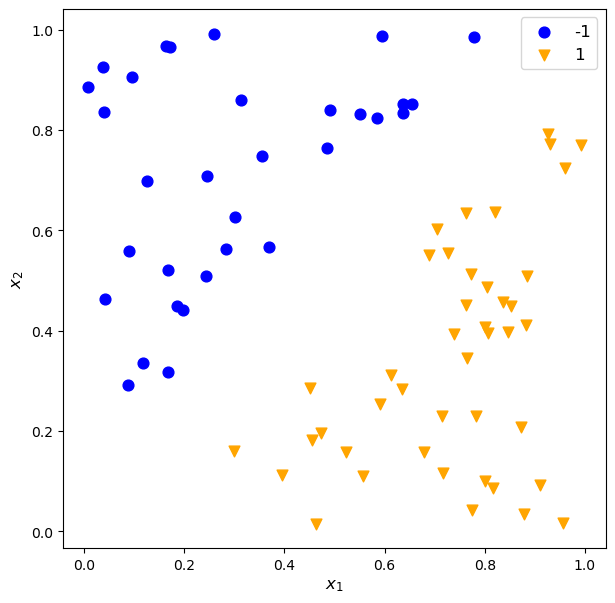

In [189]:
## Plot the data
plt.figure(figsize = (7,7))

plt.scatter(X[y == 0,0],
            X[y == 0,1],
            c = "blue",
            s = 60,
            label="-1")
plt.scatter(X[y == 1,0],
            X[y == 1,1],
            c = "orange",
            marker = 'v',
            s = 60,
            label="1")

plt.legend(fontsize = 12)
plt.xlabel("$x_1$",fontsize = 12)
plt.ylabel("$x_2$",fontsize = 12)

plt.show()

Clear linear decision boundary, so our perceptron should do just fine here.

In [191]:
w, J, pred = perceptron(X, y, z = 0.0, eta = 0.1, num_it = 10)

print("The weights are:")
print(w)

print("The errors are:")
print(J)

print("The accuracy is:")
print(accuracy(y, pred))

The weights are:
[ 0.06754809 -0.05671507]
The errors are:
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The accuracy is:
1.0


As expected, it does very well on this data set.

### Iris Dataset

Let's try this out on the benchmark Iris data set, which is described in detail at:
https://archive.ics.uci.edu/dataset/53/iris

Each observation represents an iris (a type of flower) and gives it's measurements including:
- `sepal_length`: the length of the iris's sepal in cm.
- `sepal_width`: the width of the iris's sepal in cm.
- `petal_length`: the length of the iris's petal in cm.
- `petal_width`: the width of the iris's petal in cm.
- `iris_class`: the class of the iris, can be:
    - `0` meaning it is a setosa iris
    - `1` meaning it is a versicolor iris
    - `2` meaning it is a virginica iris

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [152]:
## to get the iris data
from sklearn.datasets import load_iris

## Load the data
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['iris_class'] = iris['target']

In [154]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


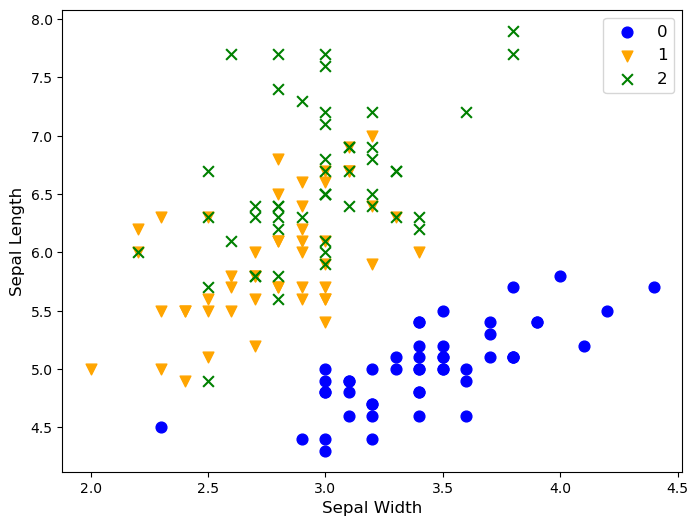

In [156]:
## Plotting the training data
## sepal_width against sepal_length
plt.figure(figsize=(8,6))

plt.scatter(iris_df.loc[iris_df.iris_class==0].sepal_width,
            iris_df.loc[iris_df.iris_class==0].sepal_length,
            c='blue',
            s=60,
            label="0")

plt.scatter(iris_df.loc[iris_df.iris_class==1].sepal_width,
            iris_df.loc[iris_df.iris_class==1].sepal_length,
            c='orange',
            s=60,
            marker='v',
            label="1")

plt.scatter(iris_df.loc[iris_df.iris_class==2].sepal_width,
            iris_df.loc[iris_df.iris_class==2].sepal_length,
            c='green',
            s=60,
            marker='x',
            label="2")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Sepal Width", fontsize=12)
plt.ylabel("Sepal Length", fontsize=12)
plt.legend(fontsize=12)

plt.show()

There seems to be a clear linear bound between the blue (setosa) iris and the other two species.
Since our perceptron model only allows for linear decision boundaries and is a binary classifier,
let's just see if we can separate the setosa iris observations from the other two.

To do so, we need to reassign any observation with iris_class = 2 to iris_class = 1.

In [157]:
iris_df[iris_df.iris_class == 2]

,sepal_length,sepal_width,petal_length,petal_width,iris_class
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [158]:
# Changing all the iris_class = 2 to class 1 so that we can use our binary classifier
iris_df.loc[iris_df.iris_class == 2, 'iris_class'] = 1

# Check that class was changed
iris_df[iris_df.iris_class == 2]

,sepal_length,sepal_width,petal_length,petal_width,iris_class


In [159]:
iris_df[iris_df.iris_class == 1]

,sepal_length,sepal_width,petal_length,petal_width,iris_class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [160]:
# Define our input and output for the training data
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

y = iris_df.iris_class.to_numpy()

In [162]:
w, J, pred = perceptron(X, y, z = 0.0, eta = 0.1, num_it = 50)

print("The weights are:")
print(w)

print("The errors are:")
print(J)

print("The accuracy is:")
print(accuracy(y, pred))

The weights are:
[-0.11 -0.36  0.52  0.22]
The errors are:
[0.5, 1.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
The accuracy is:
1.0


Looks like our classifier did well here, and it only seemed to need a few iterations.

Let's try to apply it to just the iris class 1 and 2 observations, which do not seem to have a clear
linear decision boundary. 

We will just have to reload the original data set.

In [163]:
## Load the data
iris12 = load_iris()
iris12_df = pd.DataFrame(iris12['data'], columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris12_df['iris_class'] = iris12['target']

In [168]:
# Remove all the iris class 0 observations
iris12_df = iris12_df[iris12_df.iris_class > 0]
iris12_df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [170]:
# Re-assign iris class 1 to 0
iris12_df.loc[iris12_df.iris_class == 1, 'iris_class'] = 0

# Re-assign iris class 2 to 1
iris12_df.loc[iris12_df.iris_class == 2, 'iris_class'] = 1

In [171]:
# Define our input and output for the training data
X = iris12_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
print(X.shape)

y = iris12_df.iris_class.to_numpy()
print(y.shape)

(100, 4)
(100,)


In [172]:
w, J, pred = perceptron(X, y, z = 0.0, eta = 0.1, num_it = 50)

print("The weights are:")
print(w)

print("The errors are:")
print(J)

print("The accuracy is:")
print(accuracy(y, pred))

The weights are:
[-3.48 -0.85  4.39  3.63]
The errors are:
[0.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
The accuracy is:
0.98


This actually seemed to do very well. Let's see if more iterations get us to 100%.

In [178]:
w, J, pred = perceptron(X, y, z = 0.0, eta = 0.1, num_it = 1000)

print("The weights are:")
print(w)

print("The errors are:")
print(J)

print("The accuracy is:")
print(accuracy(y, pred))

The weights are:
[-14.36 -14.78  18.77  25.82]
The errors are:
[0.5, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.0, 2.0, 2.0, 2.0, 2.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.5, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 1.5, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 2.0, 2.0, 2.0, 1.5, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 1.0, 2.0, 2.0, 1.5, 1.0, 1.0, 2.0, 2

Well that's unfortunate. It seems the best this model will do is the following:

In [179]:
w, J, pred = perceptron(X, y, z = 0.0, eta = 0.1, num_it = 1)

print("The weights are:")
print(w)

print("The errors are:")
print(J)

print("The accuracy is:")
print(accuracy(y, pred))

The weights are:
[0.63 0.33 0.6  0.25]
The errors are:
[0.5]
The accuracy is:
0.99
